In [ ]:
# Course : CS 513 - Knowledge Discovery and Data Mining
# Group Members: Branden Bulatao, Joseph Faustino, Natalie Fortes, Isabel Sutedjo
# Id : 20006007
# Purpose : Music Happiness Predictor - Predicts the happiness of music tracks based on various features.

In [2]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
# Import dataset
df = pd.read_csv("./dataset.csv")

df.drop(
    df.columns[df.columns.str.contains("unnamed", case=False)], axis=1, inplace=True
)  # drop unnamed column

df.dropna(inplace=True)  # drop rows with null values

df["valence"] = df["valence"].astype("category")
df["valence"] = df["valence"].map(
    lambda x: 0 if x < 0.5 else 1
)  # sets valence to 0 if sad, 1 if happy

# Convert 'explicit' boolean to integer (0/1)
df["explicit"] = df["explicit"].astype(int)

# One-hot encode categorical features
df = pd.get_dummies(
    df, columns=["key", "time_signature", "track_genre"], drop_first=True
)

# Scalar
scalar = StandardScaler()

# X = df.drop(['track_id', 'artists', 'album_name', 'track_name', 'valence'], axis=1)
X = df.drop(["track_id", "artists", "album_name", "track_name", "valence"], axis=1)
y = df["valence"]

# Normalize data
X = pd.DataFrame(scalar.fit_transform(X), columns=X.columns)

# Get a random number for the random_state variable
import random

random_state = random.randint(1, 100)

# Train the code
attr_train, attr_test, target_train, target_test = train_test_split(
    X, y, test_size=0.3, random_state=random_state
)

print(df.head(1))

target_train.head()
# attr_train.head()
target_test.head()

                 track_id  ... track_genre_world-music
0  5SuOikwiRyPMVoIQDJUgSV  ...                   False

[1 rows x 145 columns]


74992    1
23179    0
11468    1
31113    1
13920    1
Name: valence, dtype: int64

In [10]:
# K-nearest neighbors

k_values = [3, 5, 10]

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    # knn = KNeighborsClassifier(n_neighbors = k,weights='distance')
    knn.fit(attr_train, target_train)
    target_pred = knn.predict(attr_test)
    # accuracy = round(np.mean(target_test==target_pred ) * 100, 2)
    accuracy = accuracy_score(target_test, target_pred)
    print(f"Accuracy of model with k = {k}: {accuracy}")
    print("")

Accuracy of model with k = 3: 0.7346783625730994

Accuracy of model with k = 5: 0.7349415204678362

Accuracy of model with k = 10: 0.7358771929824561



In [13]:
# Evaluate model
accuracy = accuracy_score(target_test, target_pred)
conf_matrix = confusion_matrix(target_test, target_pred)
class_report = classification_report(target_test, target_pred)

# Print results
print(f"Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

test_actual = attr_test  # Copy attr_test
test_actual["target_pred"] = target_pred  # Create new column for prediction values
test_actual["test_actual"] = target_test  # Create new column for actual values
test_actual.head()  # Show table

misclassified = (
    test_actual["target_pred"] != test_actual["test_actual"]
).sum()  # Calculate number of misclassified cases
total_tests = len(test_actual)  # total number of cases

error_rate = misclassified / total_tests

# Error rate percentage
print(f"Error rate: {error_rate:.2%}")

Accuracy: 0.7359

Confusion Matrix:
 [[14789  3836]
 [ 5197 10378]]

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.79      0.77     18625
           1       0.73      0.67      0.70     15575

    accuracy                           0.74     34200
   macro avg       0.74      0.73      0.73     34200
weighted avg       0.74      0.74      0.73     34200

Error rate: 49.18%


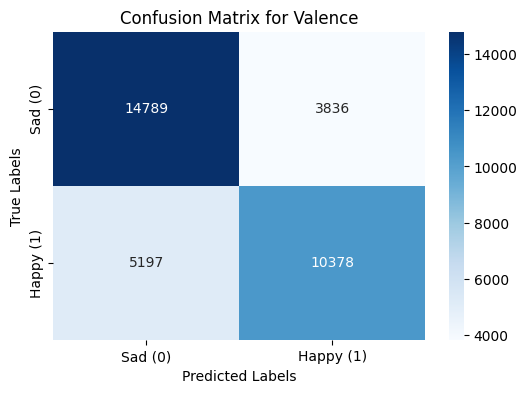

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
cm = confusion_matrix(target_test, target_pred)

# Create the heatmap
plt.figure(figsize=(6, 4))
ax = plt.subplot()
sns.heatmap(cm, annot=True, fmt="g", cmap="Blues", ax=ax)

# Labels, title, and ticks
ax.set_xlabel("Predicted Labels")
ax.set_ylabel("True Labels")
ax.set_title("Confusion Matrix for Valence")
ax.xaxis.set_ticklabels(["Sad (0)", "Happy (1)"])
ax.yaxis.set_ticklabels(["Sad (0)", "Happy (1)"])

plt.show()

In [ ]:
# False positives
results = pd.DataFrame(X)  # make sure this matches your data

test_actual = attr_test  # Copy attr_test
test_actual["target_pred"] = target_pred  # Create new column for prediction values
test_actual["test_actual"] = target_test  # Create new column for actual values
# test_actual.head()  # Show table

false_positives = test_actual[
    (test_actual["target_pred"] == 1) & (test_actual["test_actual"] == 0)
]

false_negatives = test_actual[
    (test_actual["target_pred"] == 0) & (test_actual["test_actual"] == 1)
]

print(false_positives)
print(false_negatives)
# false_positives.describe()

        popularity  duration_ms  ...  target_pred  test_actual
23179     1.244624    -0.401052  ...            1          0.0
51015     2.365456    -1.091798  ...            1          0.0
68987     0.258292    -1.193256  ...            1          0.0
38265     0.930791    -0.583641  ...            1          0.0
54683    -0.952206     1.973444  ...            1          0.0
...            ...          ...  ...          ...          ...
21572     0.661792    -0.391984  ...            1          0.0
60607    -0.593540    -0.692947  ...            1          0.0
102335   -1.490205     0.238545  ...            1          0.0
63444     0.123792     0.018844  ...            1          0.0
25894    -1.490205     0.547999  ...            1          0.0

[2752 rows x 142 columns]
       popularity  duration_ms  ...  target_pred  test_actual
11468    1.244624    -0.222480  ...            0          1.0
31113    2.096457    -0.233292  ...            0          1.0
22339   -0.324540    -0.626737 

In [ ]:
import plotly.express as px
df = pd.read_csv("./dataset.csv")

fig = px.scatter(
    df, x="danceability", y="valence", color="track_genre", hover_data=["track_name"]
)
fig.update_layout(title="Valence vs Danceability by Genre")
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

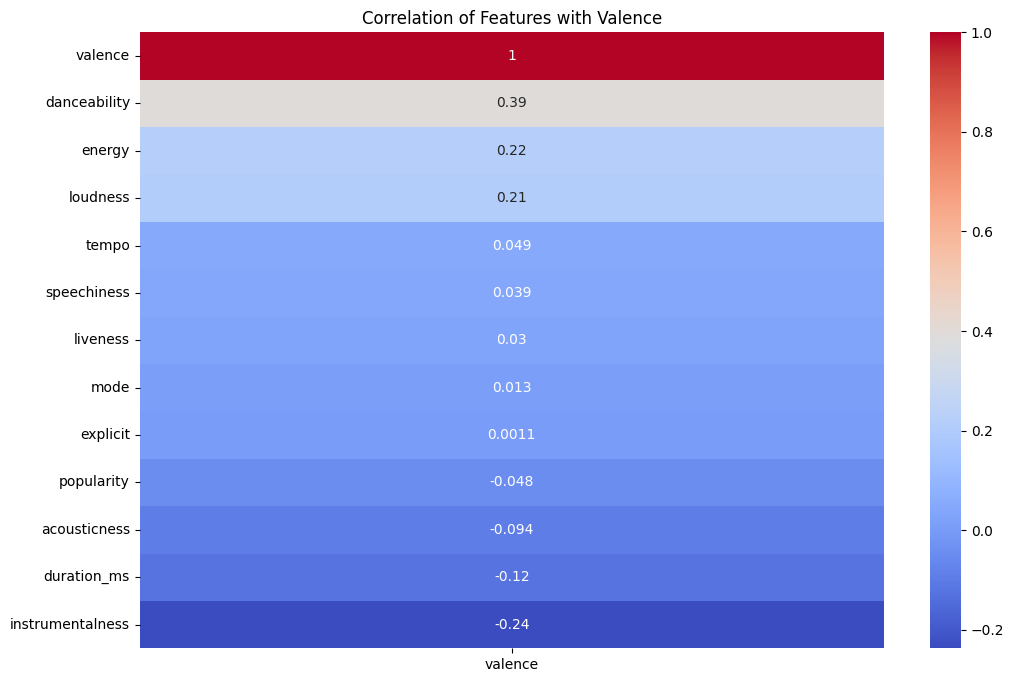

In [14]:
# Remove non-numeric columns
numeric_df = df.select_dtypes(include="number")

# Correlation matrix
corr = numeric_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(
    corr[["valence"]].sort_values(by="valence", ascending=False),
    annot=True,
    cmap="coolwarm",
)
plt.title("Correlation of Features with Valence")
plt.show()

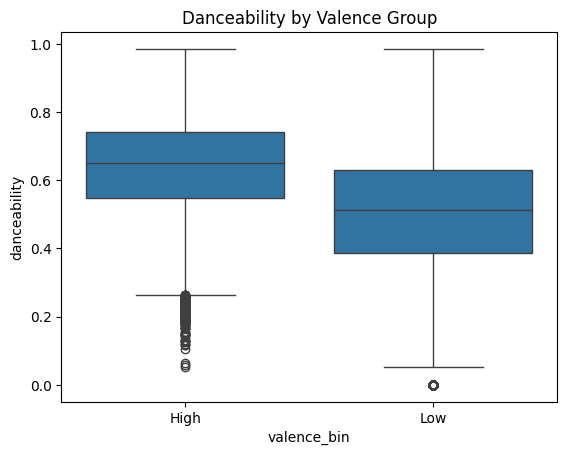

In [15]:
df["valence_bin"] = df["valence"].apply(lambda x: "High" if x > 0.5 else "Low")
sns.boxplot(x="valence_bin", y="danceability", data=df)
plt.title("Danceability by Valence Group")
plt.show()

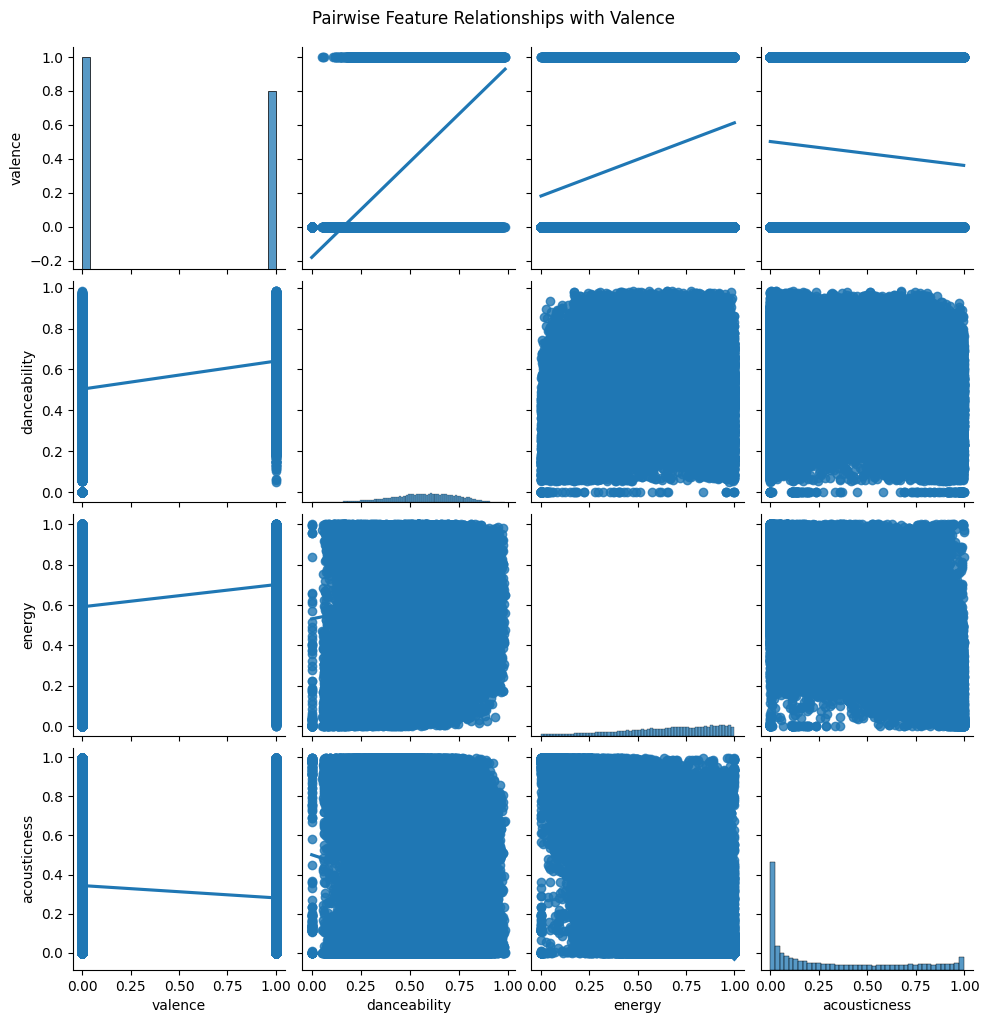

In [ ]:
# sns.pairplot(df[["valence", "danceability", "energy", "acousticness"]], kind="reg")
# plt.suptitle("Pairwise Feature Relationships with Valence", y=1.02)
# plt.show()

Using K-Nearest Neighbors with audio features to predict song valence, our model achieved a classification accuracy of 73.6%. The model performs slightly better at identifying low-valence (sadder) songs, with higher recall (79%) compared to high-valence (happier) songs (67%). Precision is fairly balanced across both classes. The findings suggest that features like danceability, energy, and acousticness have predictive value for estimating a song’s mood, but future work could explore better handling of class imbalance or using more sophisticated models to improve recall for high-valence tracks.